In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
df= pd.read_csv("2nd_fullscrape_clean.csv", index_col= 0, encoding='latin-1')

In [9]:
df.head()

,Wine,Location,Rating,Price,Year
0,Denner 2015 Dirt Worshipper Syrah (Central Coast),Central Coast,96,70.0,2015
1,Villa Creek 2014 Slide Hill Syrah (Edna Valley),Central Coast,95,65.0,2014
2,Epoch Estate Wines 2014 Block B Paderewski Vin...,Central Coast,95,95.0,2014
3,MTR Productions 2012 Memory Found Syrah (Walla...,Columbia Valley,94,85.0,2012
4,Halcón 2015 Alturas Syrah (Yorkville Highlands),North Coast,94,32.0,2015


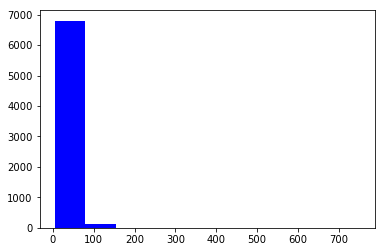

In [13]:
fig, ax = plt.subplots()
ax.hist(df["Price"],10, color="blue")
plt.show() #One wine priced at $750 obscures the histogram

In [14]:
lpdf = df.copy()

In [15]:
lpdf = lpdf[lpdf["Price"] < 200] #Only looking at "low price" wine

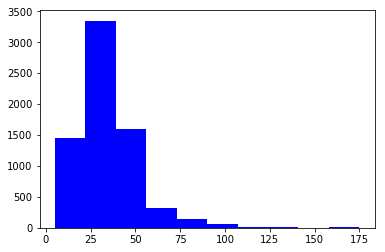

In [16]:
fig, ax = plt.subplots()
ax.hist(lpdf["Price"],10, color="blue")
plt.show()

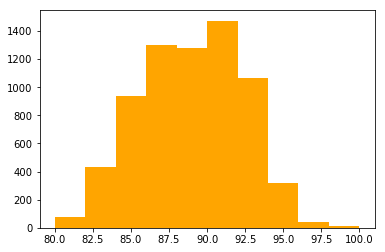

In [17]:
fig, ax = plt.subplots()
ax.hist(lpdf["Rating"],10, color="orange")
plt.show()

In [18]:
lpdf.corr()

,Rating,Price,Year
Rating,1.000000,0.508646,0.356033
Price,0.508646,1.000000,0.347668
Year,0.356033,0.347668,1.000000


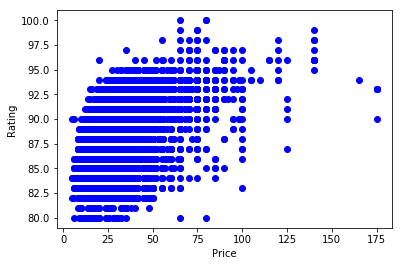

In [165]:
plt.close("all")
fig, ax = plt.subplots()
ax.scatter(lpdf["Price"],lpdf["Rating"], color="blue")
ax.set_xlabel("Price")
ax.set_ylabel("Rating")
plt.show()

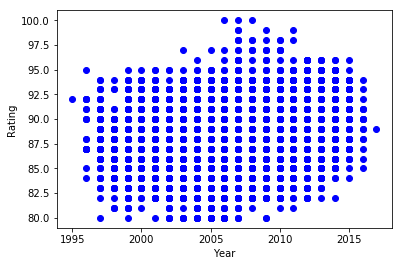

In [166]:
plt.close("all")
fig, ax = plt.subplots()
ax.scatter(lpdf["Year"],lpdf["Rating"], color="blue")
ax.set_xlabel("Year")
ax.set_ylabel("Rating")
plt.show()

In [29]:
locgroup = lpdf.groupby("Location").size() #Grouping by region grown and sorting my number of wines from each region

In [35]:
locgroup.sort_values(ascending=False) #Most Syrah is grown in the Central Coast

Location
Central Coast        2145
Columbia Valley      1971
Sonoma                856
Napa                  394
Sierra Foothills      327
California Other      301
Southern Oregon       164
California            163
Central Valley        112
Washington Other       91
Oregon Other           84
Napa-Sonoma            84
South Coast            78
North Coast            55
Idaho                  34
Willamette Valley      17
Long Island            14
Colorado               12
Virginia               10
Finger Lakes           10
New Mexico              6
Arizona                 5
Michigan                4
Texas                   4
New York Other          2
Pennsylvania            2
Kentucky                1
Nevada                  1
Ohio                    1
Oklahoma                1
New Jersey              1
dtype: int64

In [38]:
lpdf[lpdf["Location"] == "Central Coast"].index

Int64Index([   0,    1,    2,    6,    7,   12,   16,   21,   22,   23,
            ...
            6980, 6981, 6982, 6985, 6986, 6987, 6991, 6992, 6994, 6996],
           dtype='int64', length=2145)

In [40]:
lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Price"] #Testing to get only prices of the Central Coast wines

0        70.0
1        65.0
2        95.0
6        80.0
7        50.0
12       48.0
16       36.0
21       40.0
22       42.0
23       60.0
29       36.0
34       30.0
41       22.0
50      105.0
52       60.0
54       45.0
55       39.0
57       40.0
58       32.0
60       29.0
63       38.0
67       42.0
70       26.0
76       25.0
78       29.0
86       80.0
90       56.0
91       75.0
93       45.0
94       54.0
        ...  
6936     14.0
6939     22.0
6940     18.0
6943     20.0
6944     15.0
6945     25.0
6946     15.0
6948     50.0
6950     24.0
6952     15.0
6956     23.0
6964     20.0
6965     20.0
6966     17.0
6967     35.0
6968     35.0
6969     40.0
6972     18.0
6974     24.0
6975     20.0
6980     64.0
6981     25.0
6982     25.0
6985     18.0
6986     20.0
6987     22.0
6991     18.0
6992     18.0
6994     18.0
6996     15.0
Name: Price, dtype: float64

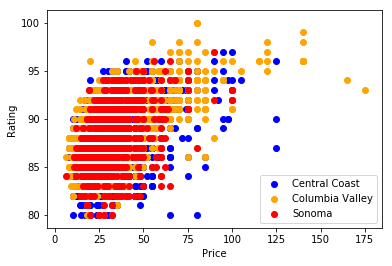

In [167]:
plt.close("all")
fig, ax = plt.subplots()
ax.scatter(lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Rating"], color="blue", label='Central Coast')
ax.scatter(lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Rating"], color="orange", label='Columbia Valley')
ax.scatter(lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Rating"], color="red", label='Sonoma')
ax.set_xlabel("Price")
ax.set_ylabel("Rating")
ax.legend(loc='best')
plt.show()

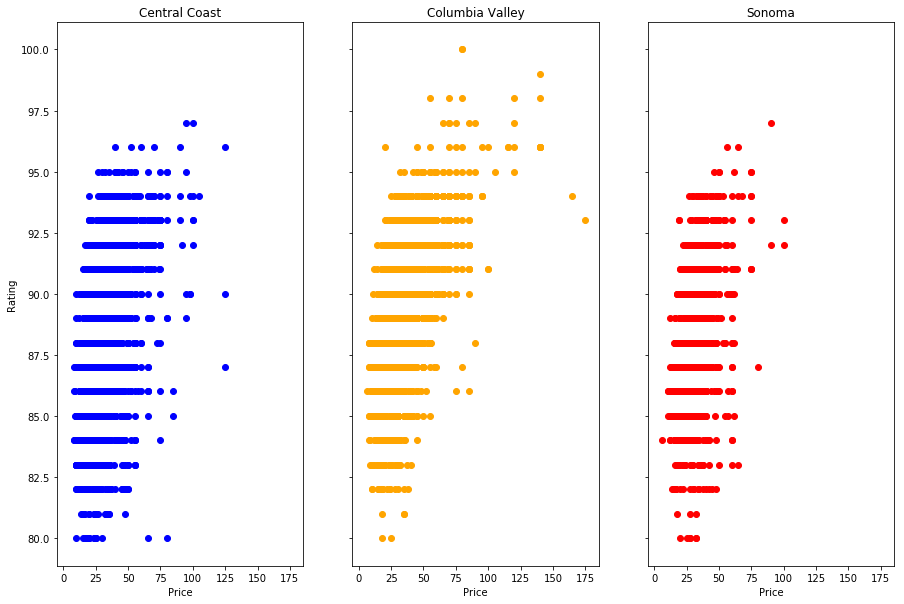

In [171]:
plt.close("all")
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))
ax[0].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Rating"], color="blue")
ax[0].set_xlabel("Price")
ax[0].set_ylabel("Rating")
ax[0].set_title("Central Coast")

ax[1].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Rating"], color="orange")
ax[1].set_xlabel("Price")
ax[1].set_title("Columbia Valley")

ax[2].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Price"],
           lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Rating"], color="red")
ax[2].set_xlabel("Price")
ax[2].set_title("Sonoma")
plt.show()

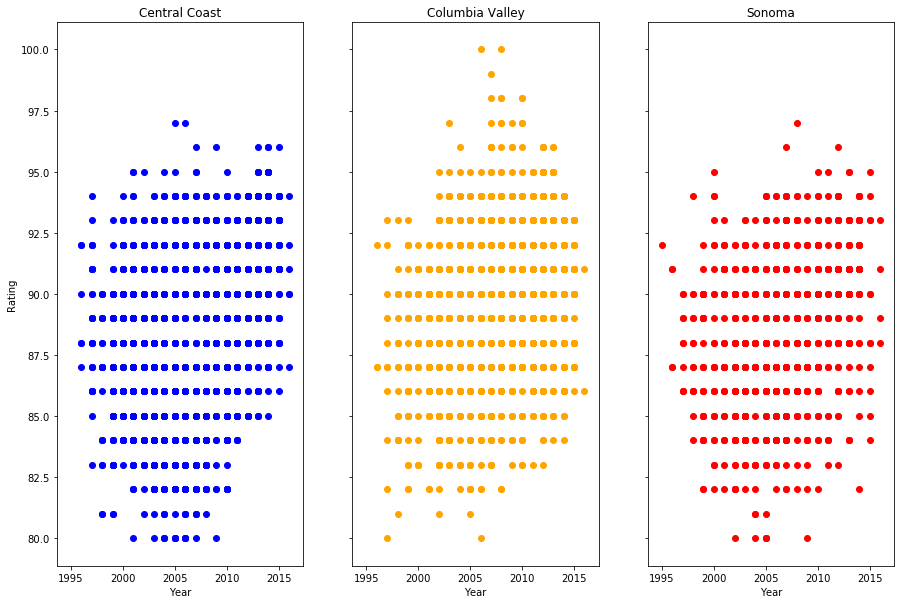

In [172]:
plt.close("all")
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))

ax[0].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Year"],
           lpdf.loc[lpdf[lpdf["Location"] == "Central Coast"].index,"Rating"], color="blue")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rating")
ax[0].set_title("Central Coast")

ax[1].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Year"],
           lpdf.loc[lpdf[lpdf["Location"] == "Columbia Valley"].index,"Rating"], color="orange")
ax[1].set_xlabel("Year")
ax[1].set_title("Columbia Valley")

ax[2].scatter(lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Year"],
           lpdf.loc[lpdf[lpdf["Location"] == "Sonoma"].index,"Rating"], color="red")
ax[2].set_xlabel("Year")
ax[2].set_title("Sonoma")

plt.show()

In [49]:
lpdf["PR"] = list(zip(lpdf["Price"], df["Rating"]))

In [93]:
uPR = lpdf.groupby("PR").size() #Getting number of unique Price,Rating combinations

In [94]:
uPR

PR
(5.0, 82)       1
(5.0, 83)       1
(5.0, 85)       1
(5.0, 86)       1
(6.0, 83)       3
(6.0, 84)       1
(6.0, 85)       6
(6.0, 86)       3
(6.0, 87)       1
(6.0, 88)       1
(6.0, 94)       1
(7.0, 83)       1
(7.0, 84)       7
(7.0, 85)       7
(7.0, 86)       2
(7.0, 87)       1
(8.0, 83)       4
(8.0, 84)       9
(8.0, 85)       9
(8.0, 86)       6
(8.0, 87)       4
(8.0, 88)       4
(8.0, 89)       3
(8.0, 90)       1
(9.0, 82)       1
(9.0, 83)       7
(9.0, 84)      14
(9.0, 85)       6
(9.0, 86)       9
(9.0, 87)       4
               ..
(100.0, 92)     2
(100.0, 93)     1
(100.0, 94)     2
(105.0, 94)     1
(105.0, 95)     1
(105.0, 96)     1
(110.0, 96)     1
(115.0, 85)     1
(115.0, 86)     1
(120.0, 82)     1
(120.0, 84)     1
(120.0, 94)     2
(120.0, 98)     1
(120.0, 99)     1
(125.0, 88)     1
(125.0, 91)     1
(125.0, 92)     1
(125.0, 93)     1
(125.0, 96)     1
(140.0, 83)     2
(140.0, 84)     2
(140.0, 85)     2
(140.0, 87)     1
(140.0, 88)     1
(140.0,

In [97]:
uPRdf = pd.DataFrame(uPR, columns=["count"]) #Making series into DataFrame

In [99]:
uPRdf.reset_index(inplace=True) #Making tuples a column in the DataFrame

In [101]:
uPRdf[['Price', 'Rating']] = uPRdf['PR'].apply(pd.Series) #Splitting tuples into seperate columns
#apply(pd.Series) splits each tuple into 2 columns

In [106]:
uPRdf["count"].max() #One Price,Rating combo appears 62 times

62

In [155]:
uPRdf.sort_values(by=["count"], ascending=True, inplace=True) #Sorting by the number of times each combo appears

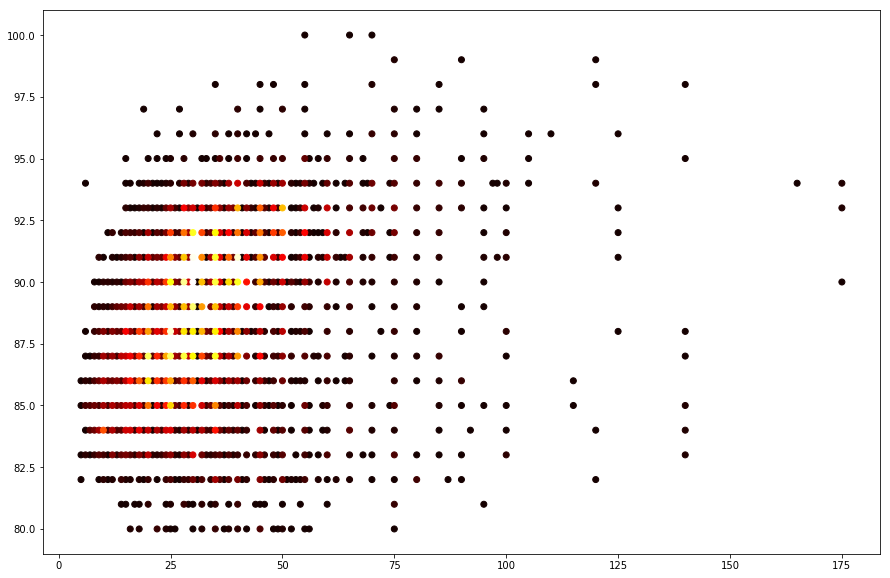

In [161]:
#Scatter plot where marker color corresponds to how common the Price,Rating combo is
plt.close("all")
fig, ax = plt.subplots(figsize=(15,10))
colors = cm.hot(uPRdf["count"]/uPRdf["count"].max())
plt.scatter(uPRdf["Price"], uPRdf["Rating"],c=colors)
plt.show() 